## Evaluating the validation dataset partition based on the corrections

In [82]:
from df_utils import *
from slicer import DatasetSlicer
from visualization.plot_functions import plot_venn

In [83]:
multilabel_df = pd.read_csv('../load_data/validation_correction/imagenet_multilabel/multilabel.csv')
finegrained_df = pd.read_csv('../load_data/validation_correction/imagenet_finegrained/finegrained.csv')
real_df = pd.read_csv('../load_data/validation_correction/imagenet_real/real.csv')
label_errors_df = pd.read_csv('../load_data/validation_correction/imagenet_label_errors/label_errors.csv')

In [84]:
dfs = [label_errors_df, real_df, multilabel_df, finegrained_df]
dSlicer = DatasetSlicer(dfs)

### Splitting the validation dataset into overlapping and non-overlapping images

In [85]:
columns = ['id']

In [86]:
intersection_split4 = intersect_and_combine(dfs, columns)
dSlicer.intersected = [intersection_split4[0]]

In [87]:
dSlicer.intersected[0]

,id,category_0,proposed_labels_0,manually_validated_0,cl_label_0,mturk_0,category_1,proposed_labels_1,manually_validated_1,category_2,proposed_labels_2,manually_validated_2,unclear_multi_labels_2,wrong_multi_labels_2,is_problematic_2,category_3,proposed_labels_3,manually_validated_3,original_label
0,ILSVRC2012_val_00017196.JPEG,X,NaN,True,3,"{'given': 1, 'guessed': 0, 'neither': 4, 'both...",A,5,True,A,5,True,NaN,"3, 4, 6",False,A,5,True,5
1,ILSVRC2012_val_00001508.JPEG,B,16,True,16,"{'given': 0, 'guessed': 5, 'neither': 0, 'both...",A,17,True,A,17,True,NaN,"13, 16",False,A,17,True,17
2,ILSVRC2012_val_00032966.JPEG,X,NaN,True,30,"{'given': 4, 'guessed': 1, 'neither': 0, 'both...",A,32,True,M,"32, 30",True,NaN,"31, 32, 30",True,A,32,True,32
3,ILSVRC2012_val_00046105.JPEG,M,"33, 983",True,983,"{'given': 0, 'guessed': 0, 'neither': 0, 'both...",M,"33, 983",True,M,"33, 983",True,NaN,NaN,False,M,"801, 34, 983",True,33
4,ILSVRC2012_val_00049260.JPEG,A,35,True,833,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",A,35,True,A,35,True,NaN,36,True,B,37,True,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,ILSVRC2012_val_00021830.JPEG,X,NaN,True,329,"{'given': 3, 'guessed': 1, 'neither': 0, 'both...",A,973,True,A,973,True,NaN,109,False,A,973,True,973
424,ILSVRC2012_val_00033028.JPEG,A,973,True,65,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",M,"973, 991",True,A,973,True,NaN,983,False,M,"973, 991",True,973
425,ILSVRC2012_val_00008648.JPEG,X,NaN,True,998,"{'given': 2, 'guessed': 0, 'neither': 0, 'both...",M,"987, 998",True,M,"987, 998",True,NaN,NaN,False,M,"987, 998",True,987
426,ILSVRC2012_val_00042458.JPEG,X,NaN,True,852,"{'given': 4, 'guessed': 0, 'neither': 0, 'both...",A,988,True,A,988,True,NaN,"326, 948, 954",False,A,988,True,988


In [88]:
intersection_split3 = find_all_intersections(dfs, 3, columns=columns, prev_intersections=intersection_split4[1])
dSlicer.intersected.append(intersection_split3[0])

In [89]:
dSlicer.intersected[1]

,id,category_0,proposed_labels_0,manually_validated_0,cl_label_0,mturk_0,category_1,proposed_labels_1,manually_validated_1,category_2,proposed_labels_2,manually_validated_2,unclear_multi_labels_2,wrong_multi_labels_2,is_problematic_2,original_label,unclear_multi_labels_1,wrong_multi_labels_1,is_problematic_1
0,ILSVRC2012_val_00000293.JPEG,A,0,True,48.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",A,0,True,A,0,True,NaN,"48, 390, 391, 394, 395",False,0,NaN,NaN,NaN
1,ILSVRC2012_val_00016962.JPEG,A,1,True,327.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",A,1,False,A,1,True,NaN,27,False,1,NaN,NaN,NaN
2,ILSVRC2012_val_00038057.JPEG,X,NaN,True,301.0,"{'given': 4, 'guessed': 1, 'neither': 0, 'both...",A,1,True,M,"1, 728",True,NaN,301,False,1,NaN,NaN,NaN
3,ILSVRC2012_val_00023185.JPEG,A,2,True,3.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",M,"2, 3",True,A,2,True,NaN,"3, 4",False,2,NaN,NaN,NaN
4,ILSVRC2012_val_00044052.JPEG,A,2,True,4.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",M,"2, 3",True,A,2,True,NaN,"4, 728, 3, 5",False,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,ILSVRC2012_val_00032741.JPEG,A,858,True,NaN,NaN,A,858,True,A,858,True,NaN,NaN,NaN,858,NaN,"424, 538, 624, 663, 698",False
5991,ILSVRC2012_val_00038521.JPEG,B,773,True,NaN,NaN,A,503,True,A,503,True,NaN,NaN,NaN,503,NaN,"422, 673, 686, 710, 759, 783, 818",False
5992,ILSVRC2012_val_00001212.JPEG,A,273,False,NaN,NaN,A,273,True,B,227,True,NaN,NaN,NaN,273,NaN,277,False
5993,ILSVRC2012_val_00026917.JPEG,A,324,False,NaN,NaN,A,324,True,A,324,True,NaN,NaN,NaN,324,NaN,NaN,False


In [90]:
intersections_34 = pd.concat([intersection_split3[1], intersection_split4[1]], ignore_index=True)

In [91]:
intersection_split2 = find_all_intersections(dfs, 2, columns=columns, prev_intersections=intersections_34)
dSlicer.intersected.append(intersection_split2[0])

In [92]:
dSlicer.intersected[2]

,id,category_0,proposed_labels_0,manually_validated_0,cl_label_0,mturk_0,category_1,proposed_labels_1,manually_validated_1,original_label,unclear_multi_labels_1,wrong_multi_labels_1,is_problematic_1,unclear_multi_labels_0,wrong_multi_labels_0,is_problematic_0
0,ILSVRC2012_val_00031094.JPEG,A,0,True,389.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",M,"0, 758",True,0,NaN,NaN,NaN,NaN,NaN,NaN
1,ILSVRC2012_val_00037383.JPEG,X,NaN,True,389.0,"{'given': 2, 'guessed': 1, 'neither': 2, 'both...",A,0,True,0,NaN,NaN,NaN,NaN,NaN,NaN
2,ILSVRC2012_val_00000236.JPEG,A,1,True,115.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",Z,NaN,True,1,NaN,NaN,NaN,NaN,NaN,NaN
3,ILSVRC2012_val_00006007.JPEG,A,1,True,27.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",A,1,True,1,NaN,NaN,NaN,NaN,NaN,NaN
4,ILSVRC2012_val_00032417.JPEG,X,NaN,True,3.0,"{'given': 2, 'guessed': 2, 'neither': 0, 'both...",M,"2, 3",True,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22161,ILSVRC2012_val_00000178.JPEG,A,248,True,NaN,NaN,A,248,True,248,NaN,NaN,NaN,NaN,NaN,NaN
22162,ILSVRC2012_val_00004347.JPEG,A,957,True,NaN,NaN,A,957,True,957,NaN,NaN,NaN,NaN,NaN,NaN
22163,ILSVRC2012_val_00045470.JPEG,A,477,False,NaN,NaN,M,"784, 477",True,477,NaN,NaN,NaN,NaN,NaN,NaN
22164,ILSVRC2012_val_00037502.JPEG,A,473,False,NaN,NaN,A,473,True,473,NaN,NaN,NaN,NaN,NaN,NaN


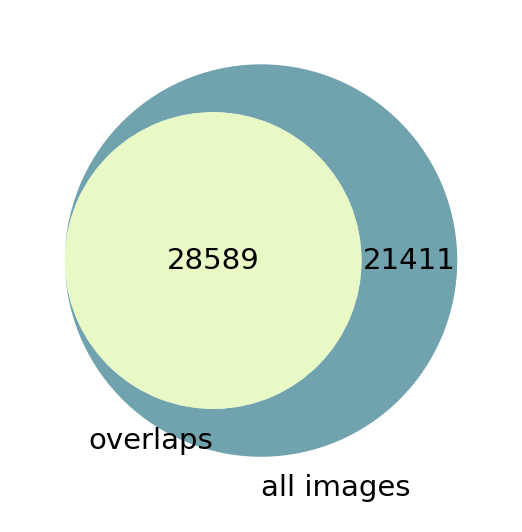

In [93]:
plot_venn(labels=['overlaps', 'all images'], set_1=dSlicer.get_all_intersected_ids(), set_2=dSlicer.get_all_ids())

In [94]:
not_intersected_ids = dSlicer.get_not_intersected_ids(dSlicer.get_all_intersected_ids())

In [95]:
dSlicer.not_intersected_flat = real_df[real_df['id'].isin(not_intersected_ids)].reset_index(drop=True)
dSlicer.not_intersected_flat.rename(columns={'manually_validated': 'validation'}, inplace=True)
dSlicer.not_intersected_flat['validation'] = dSlicer.not_intersected_flat['validation'].replace({True: '+', False: '*'})

In [96]:
dSlicer.not_intersected_flat

,id,category,original_label,proposed_labels,validation
0,ILSVRC2012_val_00009670.JPEG,A,26,26,*
1,ILSVRC2012_val_00036705.JPEG,A,948,948,*
2,ILSVRC2012_val_00003545.JPEG,A,227,227,*
3,ILSVRC2012_val_00001121.JPEG,A,141,141,*
4,ILSVRC2012_val_00046096.JPEG,A,141,141,*
...,...,...,...,...,...
21406,ILSVRC2012_val_00039307.JPEG,M,222,"222, 207",+
21407,ILSVRC2012_val_00046754.JPEG,M,861,"545, 589, 861",+
21408,ILSVRC2012_val_00047536.JPEG,A,618,618,*
21409,ILSVRC2012_val_00026559.JPEG,A,891,891,*


### Splitting the validation overlapping images into categories

In [97]:
dSlicer.intersected_same_cat = [filter_inconsistent_cats(item) for item in dSlicer.intersected]

In [98]:
dSlicer.intersected_same_cat[0]

,id,proposed_labels_0,validation,cl_label_0,mturk_0,proposed_labels_1,proposed_labels_2,unclear_multi_labels_2,wrong_multi_labels_2,is_problematic_2,proposed_labels_3,original_label,category
3,ILSVRC2012_val_00046105.JPEG,"33, 983",++++,983,"{'given': 0, 'guessed': 0, 'neither': 0, 'both...","33, 983","33, 983",NaN,NaN,False,"801, 34, 983",33,M
10,ILSVRC2012_val_00032254.JPEG,38,++++,56,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",38,38,NaN,"28, 32, 45, 53, 56, 125, 301, 303, 314",False,38,38,A
28,ILSVRC2012_val_00030649.JPEG,70,++++,317,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",70,70,NaN,"52, 74, 310, 312, 315, 317, 815, 952, 988, 989",False,70,70,A
45,ILSVRC2012_val_00000063.JPEG,107,+++*,3,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",107,107,NaN,"3, 5, 6",False,107,107,A
51,ILSVRC2012_val_00018291.JPEG,123,++++,123,"{'given': 0, 'guessed': 5, 'neither': 0, 'both...",123,123,NaN,124,True,123,124,B
52,ILSVRC2012_val_00016571.JPEG,146,++++,89,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",146,146,NaN,"81, 89, 132, 258, 279, 646, 979",False,146,146,A
57,ILSVRC2012_val_00028631.JPEG,156,+++*,247,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",156,156,NaN,247,False,156,156,A
72,ILSVRC2012_val_00004288.JPEG,177,+++*,160,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",177,177,NaN,NaN,False,177,177,A
97,ILSVRC2012_val_00012524.JPEG,218,+++*,247,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",218,218,NaN,247,False,218,218,A
114,ILSVRC2012_val_00004710.JPEG,246,++++,195,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",246,246,NaN,"180, 195, 253",False,246,246,A


In [99]:
dSlicer.intersected_same_cat[1]

,id,proposed_labels_0,validation,cl_label_0,mturk_0,proposed_labels_1,proposed_labels_2,unclear_multi_labels_2,wrong_multi_labels_2,is_problematic_2,original_label,unclear_multi_labels_1,wrong_multi_labels_1,is_problematic_1,category
0,ILSVRC2012_val_00000293.JPEG,0,+++,48.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",0,0,NaN,"48, 390, 391, 394, 395",False,0,NaN,NaN,NaN,A
1,ILSVRC2012_val_00016962.JPEG,1,++*,327.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",1,1,NaN,27,False,1,NaN,NaN,NaN,A
14,ILSVRC2012_val_00026784.JPEG,10,+++,133.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",10,10,NaN,"114, 133, 140",False,10,NaN,NaN,NaN,A
17,ILSVRC2012_val_00025535.JPEG,11,+++,92.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",11,11,NaN,92,False,11,NaN,NaN,NaN,A
18,ILSVRC2012_val_00013456.JPEG,12,++*,743.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",12,12,NaN,"10, 13, 133, 677, 716, 737, 753",False,12,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ILSVRC2012_val_00023712.JPEG,"514, 774, 523, 655",+++,NaN,NaN,"655, 523","514, 774, 655",NaN,NaN,NaN,655,NaN,"433, 752, 791, 836, 837",False,M
5988,ILSVRC2012_val_00032669.JPEG,988,++*,NaN,NaN,988,988,NaN,NaN,NaN,988,NaN,993,False,A
5989,ILSVRC2012_val_00042636.JPEG,492,+++,NaN,NaN,492,492,NaN,NaN,NaN,492,NaN,"434, 437, 471, 493, 591, 599, 619, 634, 639, 7...",False,A
5990,ILSVRC2012_val_00032741.JPEG,858,+++,NaN,NaN,858,858,NaN,NaN,NaN,858,NaN,"424, 538, 624, 663, 698",False,A


In [100]:
dSlicer.intersected_same_cat[2]

,id,proposed_labels_0,validation,cl_label_0,mturk_0,proposed_labels_1,original_label,unclear_multi_labels_1,wrong_multi_labels_1,is_problematic_1,unclear_multi_labels_0,wrong_multi_labels_0,is_problematic_0,category
3,ILSVRC2012_val_00006007.JPEG,1,++,27.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",1,1,NaN,NaN,NaN,NaN,NaN,NaN,A
16,ILSVRC2012_val_00028450.JPEG,6,++,397.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",6,6,NaN,NaN,NaN,NaN,NaN,NaN,A
17,ILSVRC2012_val_00029169.JPEG,6,+*,3.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",6,6,NaN,NaN,NaN,NaN,NaN,NaN,A
22,ILSVRC2012_val_00047137.JPEG,NaN,++,88.0,"{'given': 0, 'guessed': 0, 'neither': 5, 'both...",NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,Z
32,ILSVRC2012_val_00046833.JPEG,10,++,11.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",10,10,NaN,NaN,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22160,ILSVRC2012_val_00034692.JPEG,800,+*,NaN,NaN,800,800,NaN,NaN,NaN,NaN,NaN,NaN,A
22161,ILSVRC2012_val_00000178.JPEG,248,++,NaN,NaN,248,248,NaN,NaN,NaN,NaN,NaN,NaN,A
22162,ILSVRC2012_val_00004347.JPEG,957,++,NaN,NaN,957,957,NaN,NaN,NaN,NaN,NaN,NaN,A
22164,ILSVRC2012_val_00037502.JPEG,473,+*,NaN,NaN,473,473,NaN,NaN,NaN,NaN,NaN,NaN,A


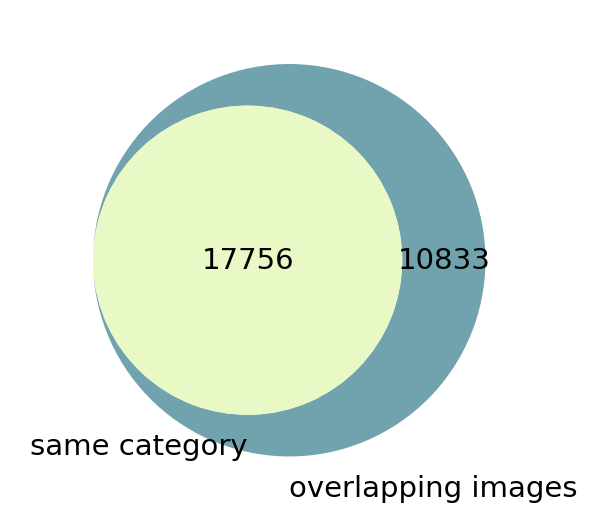

In [101]:
plot_venn(labels=['same category', 'overlapping images'], set_1=dSlicer.get_all_same_cat_ids(), set_2=dSlicer.get_all_intersected_ids())

### Splitting images into consistent label and inconsistent groups

In [102]:
dSlicer.verified = [filter_inconsistent_labels(item) for item in dSlicer.intersected_same_cat]

In [103]:
dSlicer.verified[0]

,id,validation,cl_label_0,mturk_0,unclear_multi_labels_2,wrong_multi_labels_2,is_problematic_2,original_label,category,proposed_labels
10,ILSVRC2012_val_00032254.JPEG,++++,56,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"28, 32, 45, 53, 56, 125, 301, 303, 314",False,38,A,38
28,ILSVRC2012_val_00030649.JPEG,++++,317,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"52, 74, 310, 312, 315, 317, 815, 952, 988, 989",False,70,A,70
45,ILSVRC2012_val_00000063.JPEG,+++*,3,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"3, 5, 6",False,107,A,107
51,ILSVRC2012_val_00018291.JPEG,++++,123,"{'given': 0, 'guessed': 5, 'neither': 0, 'both...",NaN,124,True,124,B,123
52,ILSVRC2012_val_00016571.JPEG,++++,89,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"81, 89, 132, 258, 279, 646, 979",False,146,A,146
57,ILSVRC2012_val_00028631.JPEG,+++*,247,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,247,False,156,A,156
72,ILSVRC2012_val_00004288.JPEG,+++*,160,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,NaN,False,177,A,177
97,ILSVRC2012_val_00012524.JPEG,+++*,247,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,247,False,218,A,218
114,ILSVRC2012_val_00004710.JPEG,++++,195,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"180, 195, 253",False,246,A,246
122,ILSVRC2012_val_00030595.JPEG,+++*,368,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,259,False,260,A,260


In [104]:
dSlicer.verified[1]

,id,validation,cl_label_0,mturk_0,unclear_multi_labels_2,wrong_multi_labels_2,is_problematic_2,original_label,unclear_multi_labels_1,wrong_multi_labels_1,is_problematic_1,category,proposed_labels
0,ILSVRC2012_val_00000293.JPEG,+++,48.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"48, 390, 391, 394, 395",False,0,NaN,NaN,NaN,A,0
1,ILSVRC2012_val_00016962.JPEG,++*,327.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,27,False,1,NaN,NaN,NaN,A,1
14,ILSVRC2012_val_00026784.JPEG,+++,133.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"114, 133, 140",False,10,NaN,NaN,NaN,A,10
17,ILSVRC2012_val_00025535.JPEG,+++,92.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,92,False,11,NaN,NaN,NaN,A,11
18,ILSVRC2012_val_00013456.JPEG,++*,743.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",NaN,"10, 13, 133, 677, 716, 737, 753",False,12,NaN,NaN,NaN,A,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,ILSVRC2012_val_00004080.JPEG,++*,NaN,NaN,NaN,NaN,NaN,816,NaN,"542, 623, 728, 777",False,A,816
5988,ILSVRC2012_val_00032669.JPEG,++*,NaN,NaN,NaN,NaN,NaN,988,NaN,993,False,A,988
5989,ILSVRC2012_val_00042636.JPEG,+++,NaN,NaN,NaN,NaN,NaN,492,NaN,"434, 437, 471, 493, 591, 599, 619, 634, 639, 7...",False,A,492
5990,ILSVRC2012_val_00032741.JPEG,+++,NaN,NaN,NaN,NaN,NaN,858,NaN,"424, 538, 624, 663, 698",False,A,858


In [105]:
dSlicer.verified[2]

,id,validation,cl_label_0,mturk_0,original_label,unclear_multi_labels_1,wrong_multi_labels_1,is_problematic_1,unclear_multi_labels_0,wrong_multi_labels_0,is_problematic_0,category,proposed_labels
3,ILSVRC2012_val_00006007.JPEG,++,27.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",1,NaN,NaN,NaN,NaN,NaN,NaN,A,1
16,ILSVRC2012_val_00028450.JPEG,++,397.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",6,NaN,NaN,NaN,NaN,NaN,NaN,A,6
17,ILSVRC2012_val_00029169.JPEG,+*,3.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",6,NaN,NaN,NaN,NaN,NaN,NaN,A,6
22,ILSVRC2012_val_00047137.JPEG,++,88.0,"{'given': 0, 'guessed': 0, 'neither': 5, 'both...",7,NaN,NaN,NaN,NaN,NaN,NaN,Z,NaN
32,ILSVRC2012_val_00046833.JPEG,++,11.0,"{'given': 5, 'guessed': 0, 'neither': 0, 'both...",10,NaN,NaN,NaN,NaN,NaN,NaN,A,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22160,ILSVRC2012_val_00034692.JPEG,+*,NaN,NaN,800,NaN,NaN,NaN,NaN,NaN,NaN,A,800
22161,ILSVRC2012_val_00000178.JPEG,++,NaN,NaN,248,NaN,NaN,NaN,NaN,NaN,NaN,A,248
22162,ILSVRC2012_val_00004347.JPEG,++,NaN,NaN,957,NaN,NaN,NaN,NaN,NaN,NaN,A,957
22164,ILSVRC2012_val_00037502.JPEG,+*,NaN,NaN,473,NaN,NaN,NaN,NaN,NaN,NaN,A,473


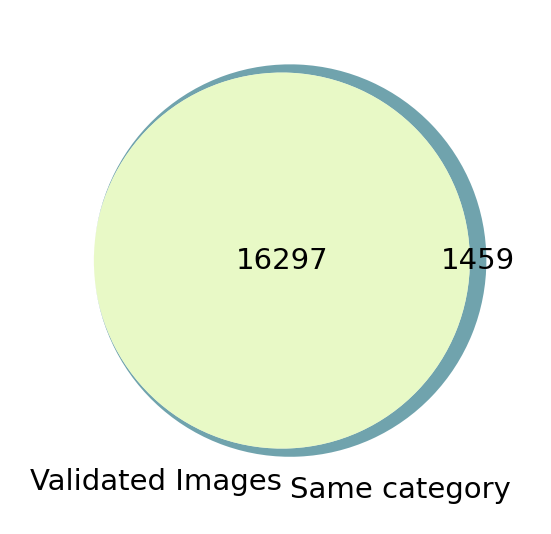

In [106]:
plot_venn(labels=['Validated Images', 'Same category'], set_1=dSlicer.get_all_verified_ids(), set_2=dSlicer.get_all_same_cat_ids())

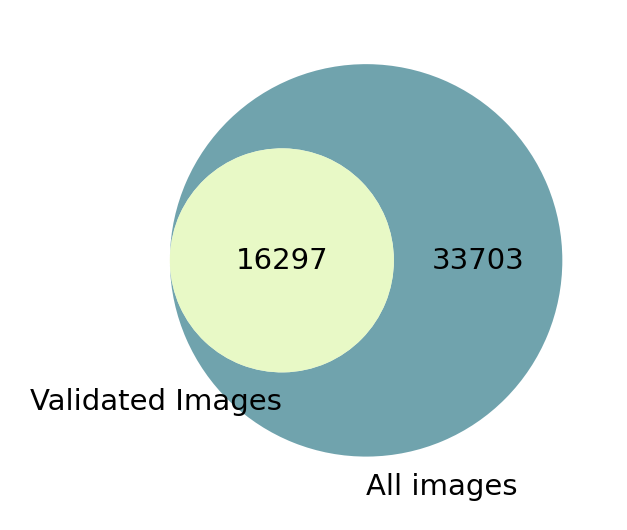

In [107]:
plot_venn(labels=['Validated Images', 'All images'], set_1=dSlicer.get_all_verified_ids(), set_2=dSlicer.get_all_ids())

In [108]:
inconsistent_ids = dSlicer.get_not_intersected_ids(dSlicer.get_all_verified_ids(), dSlicer.get_all_intersected_ids())

### Table displaying all images validated for consistency across corrections

In [109]:
dSlicer.concat_verified()

,id,category,validation,original_label,proposed_labels
0,ILSVRC2012_val_00032254.JPEG,A,++++,38,38
1,ILSVRC2012_val_00030649.JPEG,A,++++,70,70
2,ILSVRC2012_val_00000063.JPEG,A,+++*,107,107
3,ILSVRC2012_val_00018291.JPEG,B,++++,124,123
4,ILSVRC2012_val_00016571.JPEG,A,++++,146,146
...,...,...,...,...,...
16292,ILSVRC2012_val_00034692.JPEG,A,+*,800,800
16293,ILSVRC2012_val_00000178.JPEG,A,++,248,248
16294,ILSVRC2012_val_00004347.JPEG,A,++,957,957
16295,ILSVRC2012_val_00037502.JPEG,A,+*,473,473


### The clean validation set can be obtained by combining the non-overlapping images and the consistent label images

In [110]:
filtered_not_intersected = filter_by_categories(dSlicer.not_intersected_flat, ['A', 'B', 'M'])

In [111]:
filtered_not_intersected

,id,category,original_label,proposed_labels,validation
0,ILSVRC2012_val_00009670.JPEG,A,26,26,*
1,ILSVRC2012_val_00036705.JPEG,A,948,948,*
2,ILSVRC2012_val_00003545.JPEG,A,227,227,*
3,ILSVRC2012_val_00001121.JPEG,A,141,141,*
4,ILSVRC2012_val_00046096.JPEG,A,141,141,*
...,...,...,...,...,...
21406,ILSVRC2012_val_00039307.JPEG,M,222,"222, 207",+
21407,ILSVRC2012_val_00046754.JPEG,M,861,"545, 589, 861",+
21408,ILSVRC2012_val_00047536.JPEG,A,618,618,*
21409,ILSVRC2012_val_00026559.JPEG,A,891,891,*


In [112]:
filtered_consistent = filter_by_categories(dSlicer.verified_flat, ['A', 'B', 'M'])

In [113]:
filtered_consistent

,id,category,validation,original_label,proposed_labels
0,ILSVRC2012_val_00032254.JPEG,A,++++,38,38
1,ILSVRC2012_val_00030649.JPEG,A,++++,70,70
2,ILSVRC2012_val_00000063.JPEG,A,+++*,107,107
3,ILSVRC2012_val_00018291.JPEG,B,++++,124,123
4,ILSVRC2012_val_00016571.JPEG,A,++++,146,146
...,...,...,...,...,...
16292,ILSVRC2012_val_00034692.JPEG,A,+*,800,800
16293,ILSVRC2012_val_00000178.JPEG,A,++,248,248
16294,ILSVRC2012_val_00004347.JPEG,A,++,957,957
16295,ILSVRC2012_val_00037502.JPEG,A,+*,473,473


In [114]:
clean_validation = pd.concat([filtered_not_intersected, filtered_consistent], ignore_index=True).drop(columns=['category'])

In [115]:
clean_validation

,id,original_label,proposed_labels,validation
0,ILSVRC2012_val_00009670.JPEG,26,26,*
1,ILSVRC2012_val_00036705.JPEG,948,948,*
2,ILSVRC2012_val_00003545.JPEG,227,227,*
3,ILSVRC2012_val_00001121.JPEG,141,141,*
4,ILSVRC2012_val_00046096.JPEG,141,141,*
...,...,...,...,...
36410,ILSVRC2012_val_00034692.JPEG,800,800,+*
36411,ILSVRC2012_val_00000178.JPEG,248,248,++
36412,ILSVRC2012_val_00004347.JPEG,957,957,++
36413,ILSVRC2012_val_00037502.JPEG,473,473,+*


In [116]:
clean_validation.to_csv('results/clean_validation.csv', index=False)